In [24]:
import tensorflow.compat.v1 as tf 
tf.disable_v2_behavior()

In [25]:
import numpy as np 
import matplotlib.pyplot as plt

In [26]:
x_train = [1, 2, 3]


In [27]:
y_train = [2+1 +0.1, 4+1 -0.2, 6+1 +0.15]


Text(0, 0.5, 'Y')

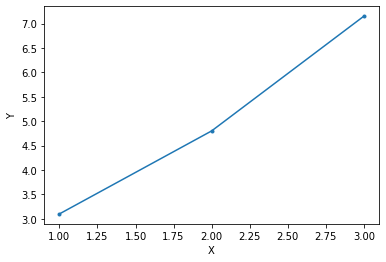

In [28]:
plt.plot(x_train, y_train,'.-') 
plt.xlabel('X') 
plt.ylabel('Y')

초기화, Initialization

In [29]:
w0 = 7; # 바 꾸 어 보 세 요
b0 = -10; # 바 꾸 어 보 세 요


Parameter 설정


In [30]:
W = tf.Variable(w0*tf.ones([1]), name='weight') 
b = tf.Variable(b0*tf.ones([1]), name='bias')


Our hypothesis XW+b

In [31]:
hypothesis = x_train * W + b


cost/loss function

In [32]:
cost = tf.reduce_mean(tf.square(hypothesis - y_train))


Optimizer 설정


In [33]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01) 
#optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

Launch the graph in a session


In [34]:
sess = tf.Session()

Initializes global variables in the graph.


In [35]:
sess.run(tf.global_variables_initializer())


실행!

In [36]:
nb_epoch = 2000

In [37]:
for i in range(100):    
  if i % 20 ==0:        
    print(i)

0
20
40
60
80


In [38]:
vw = [] # empty list 
vb = [] 
vcost = []

In [39]:
for step in range(nb_epoch+1):    
  sess.run(train)   
  w1 = sess.run(W)[0] # slope    
  b1 = sess.run(b)[0] # bias    
  cost1 = sess.run(cost)        
  
  vw.append(w1)    
  vb.append(b1)    
  vcost.append(cost1)        
  if step % 100 == 0:
    print(step, '--', cost1, '--',  w1, '--', b1)


0 -- 17.451681 -- 6.9743333 -- -9.979667
100 -- 10.741467 -- 5.8273573 -- -7.6769824
200 -- 6.6465454 -- 5.0139985 -- -5.8280296
300 -- 4.1161275 -- 4.3746243 -- -4.3745832
400 -- 2.5524843 -- 3.872019 -- -3.2320423
500 -- 1.5862474 -- 3.4769251 -- -2.3339
600 -- 0.9891723 -- 3.1663456 -- -1.6278797
700 -- 0.6202163 -- 2.9222016 -- -1.0728834
800 -- 0.3922235 -- 2.730282 -- -0.636605
900 -- 0.25133815 -- 2.5794158 -- -0.29365098
1000 -- 0.1642795 -- 2.4608214 -- -0.024057968
1100 -- 0.11048248 -- 2.3675954 -- 0.18786687
1200 -- 0.07723926 -- 2.294311 -- 0.3544592
1300 -- 0.056697037 -- 2.2367034 -- 0.4854154
1400 -- 0.04400313 -- 2.1914184 -- 0.588359
1500 -- 0.036159087 -- 2.1558201 -- 0.6692825
1600 -- 0.031311933 -- 2.1278367 -- 0.73289526
1700 -- 0.028316746 -- 2.1058393 -- 0.7829006
1800 -- 0.026465826 -- 2.0885472 -- 0.8222094
1900 -- 0.025322104 -- 2.0749538 -- 0.85311013
2000 -- 0.02461526 -- 2.0642674 -- 0.87740105


In [40]:
w1 = sess.run(W)[0] # slope 
b1 = sess.run(b)[0] # bias 
str1 = 'y={:.3}x + {:.3}'.format(w1, b1) 
print(w1, b1) 
print(str1)

2.0642674 0.87740105
y=2.06x + 0.877


Text(0.5, 1.0, 'y=2.06x + 0.877')

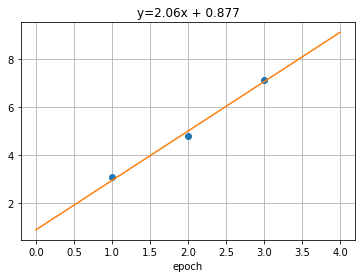

In [41]:
plt.figure(1) 
plt.plot(x_train, y_train,'o') 

x1 = np.min(x_train)-1, np.max(x_train)+1 
y1 = np.dot(w1,x1) + b1 
plt.plot(x1, y1) 
plt.grid() 
plt.xlabel('epoch') 
plt.title(str1)

Text(0.5, 0, 'epoch')

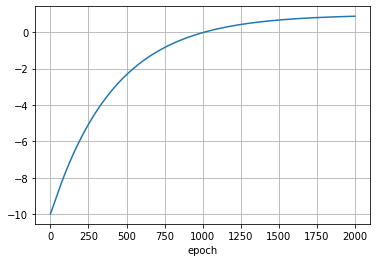

In [42]:
plt.plot(vb) 
plt.grid() 
plt.xlabel('epoch')

Text(0, 0.5, 'w')

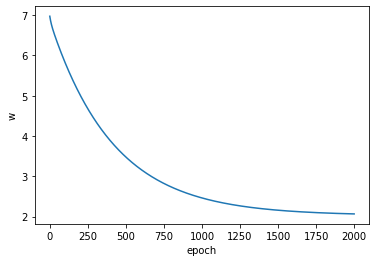

In [43]:
plt.plot(vw)
plt.xlabel('epoch') 
plt.ylabel('w')

Text(0.5, 0, 'epoch')

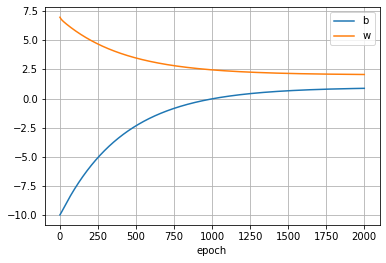

In [44]:
plt.plot(vb) 
plt.plot(vw) 
plt.legend(['b', 'w']) 
plt.grid() 
plt.xlabel('epoch')

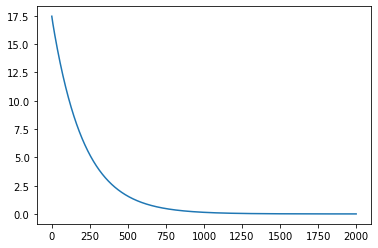

In [45]:
plt.plot(vcost)